## importing librarires

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Data Preprocessing

## Training Image Preprocessing

In [15]:
training_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
   
)



Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [16]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

  
)

Found 17572 files belonging to 38 classes.


In [11]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [12]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 62.    53.25  52.25]
   [115.   104.   102.  ]
   [124.25 108.25 108.25]
   ...
   [164.75 155.75 150.75]
   [164.   155.   150.  ]
   [165.5  156.5  151.5 ]]

  [[ 62.5   53.25  51.75]
   [110.    99.    97.  ]
   [123.   107.   107.  ]
   ...
   [164.5  155.5  150.5 ]
   [163.5  154.5  149.5 ]
   [163.25 154.25 149.25]]

  [[ 61.75  52.5   51.  ]
   [120.   109.   107.  ]
   [120.25 104.25 104.25]
   ...
   [166.75 157.75 152.75]
   [164.5  155.5  150.5 ]
   [162.   153.   148.  ]]

  ...

  [[ 74.5   63.5   62.5 ]
   [134.5  123.5  121.5 ]
   [144.   130.   129.  ]
   ...
   [202.5  194.5  192.5 ]
   [195.75 187.75 185.75]
   [200.25 192.25 190.25]]

  [[ 74.75  65.25  64.25]
   [138.25 127.25 125.25]
   [140.   126.   125.  ]
   ...
   [201.75 193.75 191.75]
   [196.   188.   186.  ]
   [200.75 192.75 190.75]]

  [[ 79.5   70.    69.  ]
   [140.5  129.5  127.5 ]
   [141.25 127.25 126.25]
   ...
   [199.5  191.5  189.5 ]
   [202.5  194.5  192.5 ]
   [208.25 200.25 19

## Building Model

In [13]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [14]:
model=Sequential()

In [15]:
## Building Convolutional Layer

In [16]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/home/manit/miniconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(units=1,activation='relu'))

In [22]:
#output layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,989,446 (68.62 MB)

 Trainable params: 17,989,446 (68.62 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [29]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


I0000 00:00:1744989725.160628   18943 service.cc:148] XLA service 0x7309700296d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744989725.160660   18943 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-04-18 20:52:05.191800: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744989725.366132   18943 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-18 20:52:05.811251: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_696', 4 bytes spill stores, 4 bytes spill loads

2025-04-18 20:52:05.881537: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_696

   3/2197 ━━━━━━━━━━━━━━━━━━━━ 2:00 55ms/step - accuracy: 0.9878 - loss: 0.0361 

I0000 00:00:1744989732.860749   18943 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9581 - loss: 0.1386  

2025-04-18 20:54:12.043702: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_696', 40 bytes spill stores, 40 bytes spill loads

2025-04-18 20:54:12.142758: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_696', 244 bytes spill stores, 244 bytes spill loads

2025-04-18 20:54:12.483620: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_696', 132 bytes spill stores, 132 bytes spill loads

2025-04-18 20:54:12.484661: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1014', 44 bytes spill stores, 44 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 61ms/step - accuracy: 0.9581 - loss: 0.1386 - val_accuracy: 0.9242 - val_loss: 0.2746
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 57ms/step - accuracy: 0.9619 - loss: 0.1264 - val_accuracy: 0.8942 - val_loss: 0.3997
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 58ms/step - accuracy: 0.9585 - loss: 0.1355 - val_accuracy: 0.9140 - val_loss: 0.3288
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 125s 57ms/step - accuracy: 0.9683 - loss: 0.1038 - val_accuracy: 0.9208 - val_loss: 0.3107
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 124s 56ms/step - accuracy: 0.9640 - loss: 0.1184 - val_accuracy: 0.8936 - val_loss: 0.4195
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 124s 56ms/step - accuracy: 0.9649 - loss: 0.1132 - val_accuracy: 0.8975 - val_loss: 0.3908
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 124s 56ms/step - accuracy: 0.9683 - loss: 0.1025 - val_accuracy: 0.9194 - val_loss: 0.3346
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 125s 57ms/step - accuracy: 0.9688 - lo

## Model Evaluation

In [30]:
#Model evaluation on training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.9683 - loss: 0.1090


In [31]:
print(train_loss,train_acc)

0.09989669173955917 0.9711928367614746


In [32]:
#Model on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9091 - loss: 0.4119


In [33]:
print(val_loss,val_acc)

0.40500608086586 0.9076940417289734


## Saving model

In [39]:
model.save("trained_model.keras")

In [40]:
training_history.history

{'accuracy': [0.9591009020805359,
  0.9621310234069824,
  0.961604654788971,
  0.9658154845237732,
  0.9638665914535522,
  0.9644071459770203,
  0.9660431146621704,
  0.9674798846244812,
  0.9708656668663025,
  0.9673376679420471],
 'loss': [0.1319485753774643,
  0.12288817018270493,
  0.12483030557632446,
  0.11124614626169205,
  0.11997243016958237,
  0.12137023359537125,
  0.11562563478946686,
  0.10954920947551727,
  0.09984595328569412,
  0.10914428532123566],
 'val_accuracy': [0.9241976141929626,
  0.894206702709198,
  0.9139540195465088,
  0.9207830429077148,
  0.8935806751251221,
  0.8974505066871643,
  0.919360339641571,
  0.9128158688545227,
  0.9247097373008728,
  0.9076940417289734],
 'val_loss': [0.27461186051368713,
  0.3996746242046356,
  0.328759104013443,
  0.3106561303138733,
  0.4194521903991699,
  0.3907822072505951,
  0.3346419930458069,
  0.40055665373802185,
  0.3293423056602478,
  0.4050058424472809]}

In [42]:
##Recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [43]:
training_history.history['accuracy']

[0.9591009020805359,
 0.9621310234069824,
 0.961604654788971,
 0.9658154845237732,
 0.9638665914535522,
 0.9644071459770203,
 0.9660431146621704,
 0.9674798846244812,
 0.9708656668663025,
 0.9673376679420471]

## Accuracy visualization

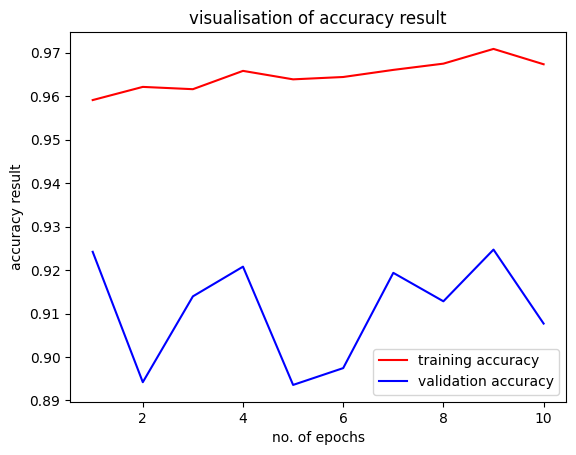

In [48]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.xlabel("no. of epochs")
plt.ylabel("accuracy result")
plt.title("visualisation of accuracy result")
plt.legend()
plt.show()

## other metrics

In [10]:
import json
with open('training_hist.json','r') as f:
    history=json.load(f)

In [17]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [18]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

  
)

Found 17572 files belonging to 38 classes.


In [19]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

I0000 00:00:1745071714.887491   67930 service.cc:148] XLA service 0x77e11c0040c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745071714.887737   67930 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-04-19 19:38:34.905776: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745071714.983463   67930 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-19 19:38:35.759024: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_121', 4 bytes spill stores, 4 bytes spill loads

2025-04-19 19:38:35.796255: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_121

 13/550 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step 

I0000 00:00:1745071718.262742   67930 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step


(array([[9.99954224e-01, 4.50804946e-05, 1.76719542e-10, ...,
         7.50048667e-17, 5.05472435e-11, 6.85467958e-13],
        [9.99989271e-01, 3.51660603e-08, 6.11510079e-11, ...,
         1.47029705e-15, 1.46620160e-09, 4.99151116e-16],
        [9.99977708e-01, 1.02090883e-06, 3.44963537e-11, ...,
         4.74269629e-17, 1.43119849e-10, 1.19507970e-09],
        ...,
        [8.00369157e-13, 5.66346210e-21, 1.74189801e-10, ...,
         4.83629954e-08, 8.24991117e-14, 9.99999166e-01],
        [8.08521951e-14, 7.66515976e-25, 3.58029714e-13, ...,
         3.95104838e-10, 1.13550960e-19, 9.99989271e-01],
        [1.45819941e-14, 2.99920205e-17, 1.15431636e-10, ...,
         6.51311427e-12, 1.04903730e-08, 9.65079606e-01]], dtype=float32),
 (17572, 38))

In [22]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [23]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [24]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

2025-04-19 19:46:31.847856: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [25]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.91      0.93       504
                                 Apple___Black_rot       0.96      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.93      0.91      0.92       440
                                   Apple___healthy       0.83      0.93      0.88       502
                               Blueberry___healthy       0.93      0.92      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.95      0.96       421
                 Cherry_(including_sour)___healthy       0.88      0.98      0.93       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.89      0.90       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.90      0.

In [29]:
cm=confusion_matrix(y_true,predicted_categories)
cm

array([[460,   5,   1, ...,   0,   0,   0],
       [  0, 489,   0, ...,   0,   0,   0],
       [  5,   1, 400, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 480,   0,   0],
       [  0,   0,   0, ...,   0, 438,   0],
       [  0,   0,   1, ...,   0,   0, 433]])

## confusion matrix visualization

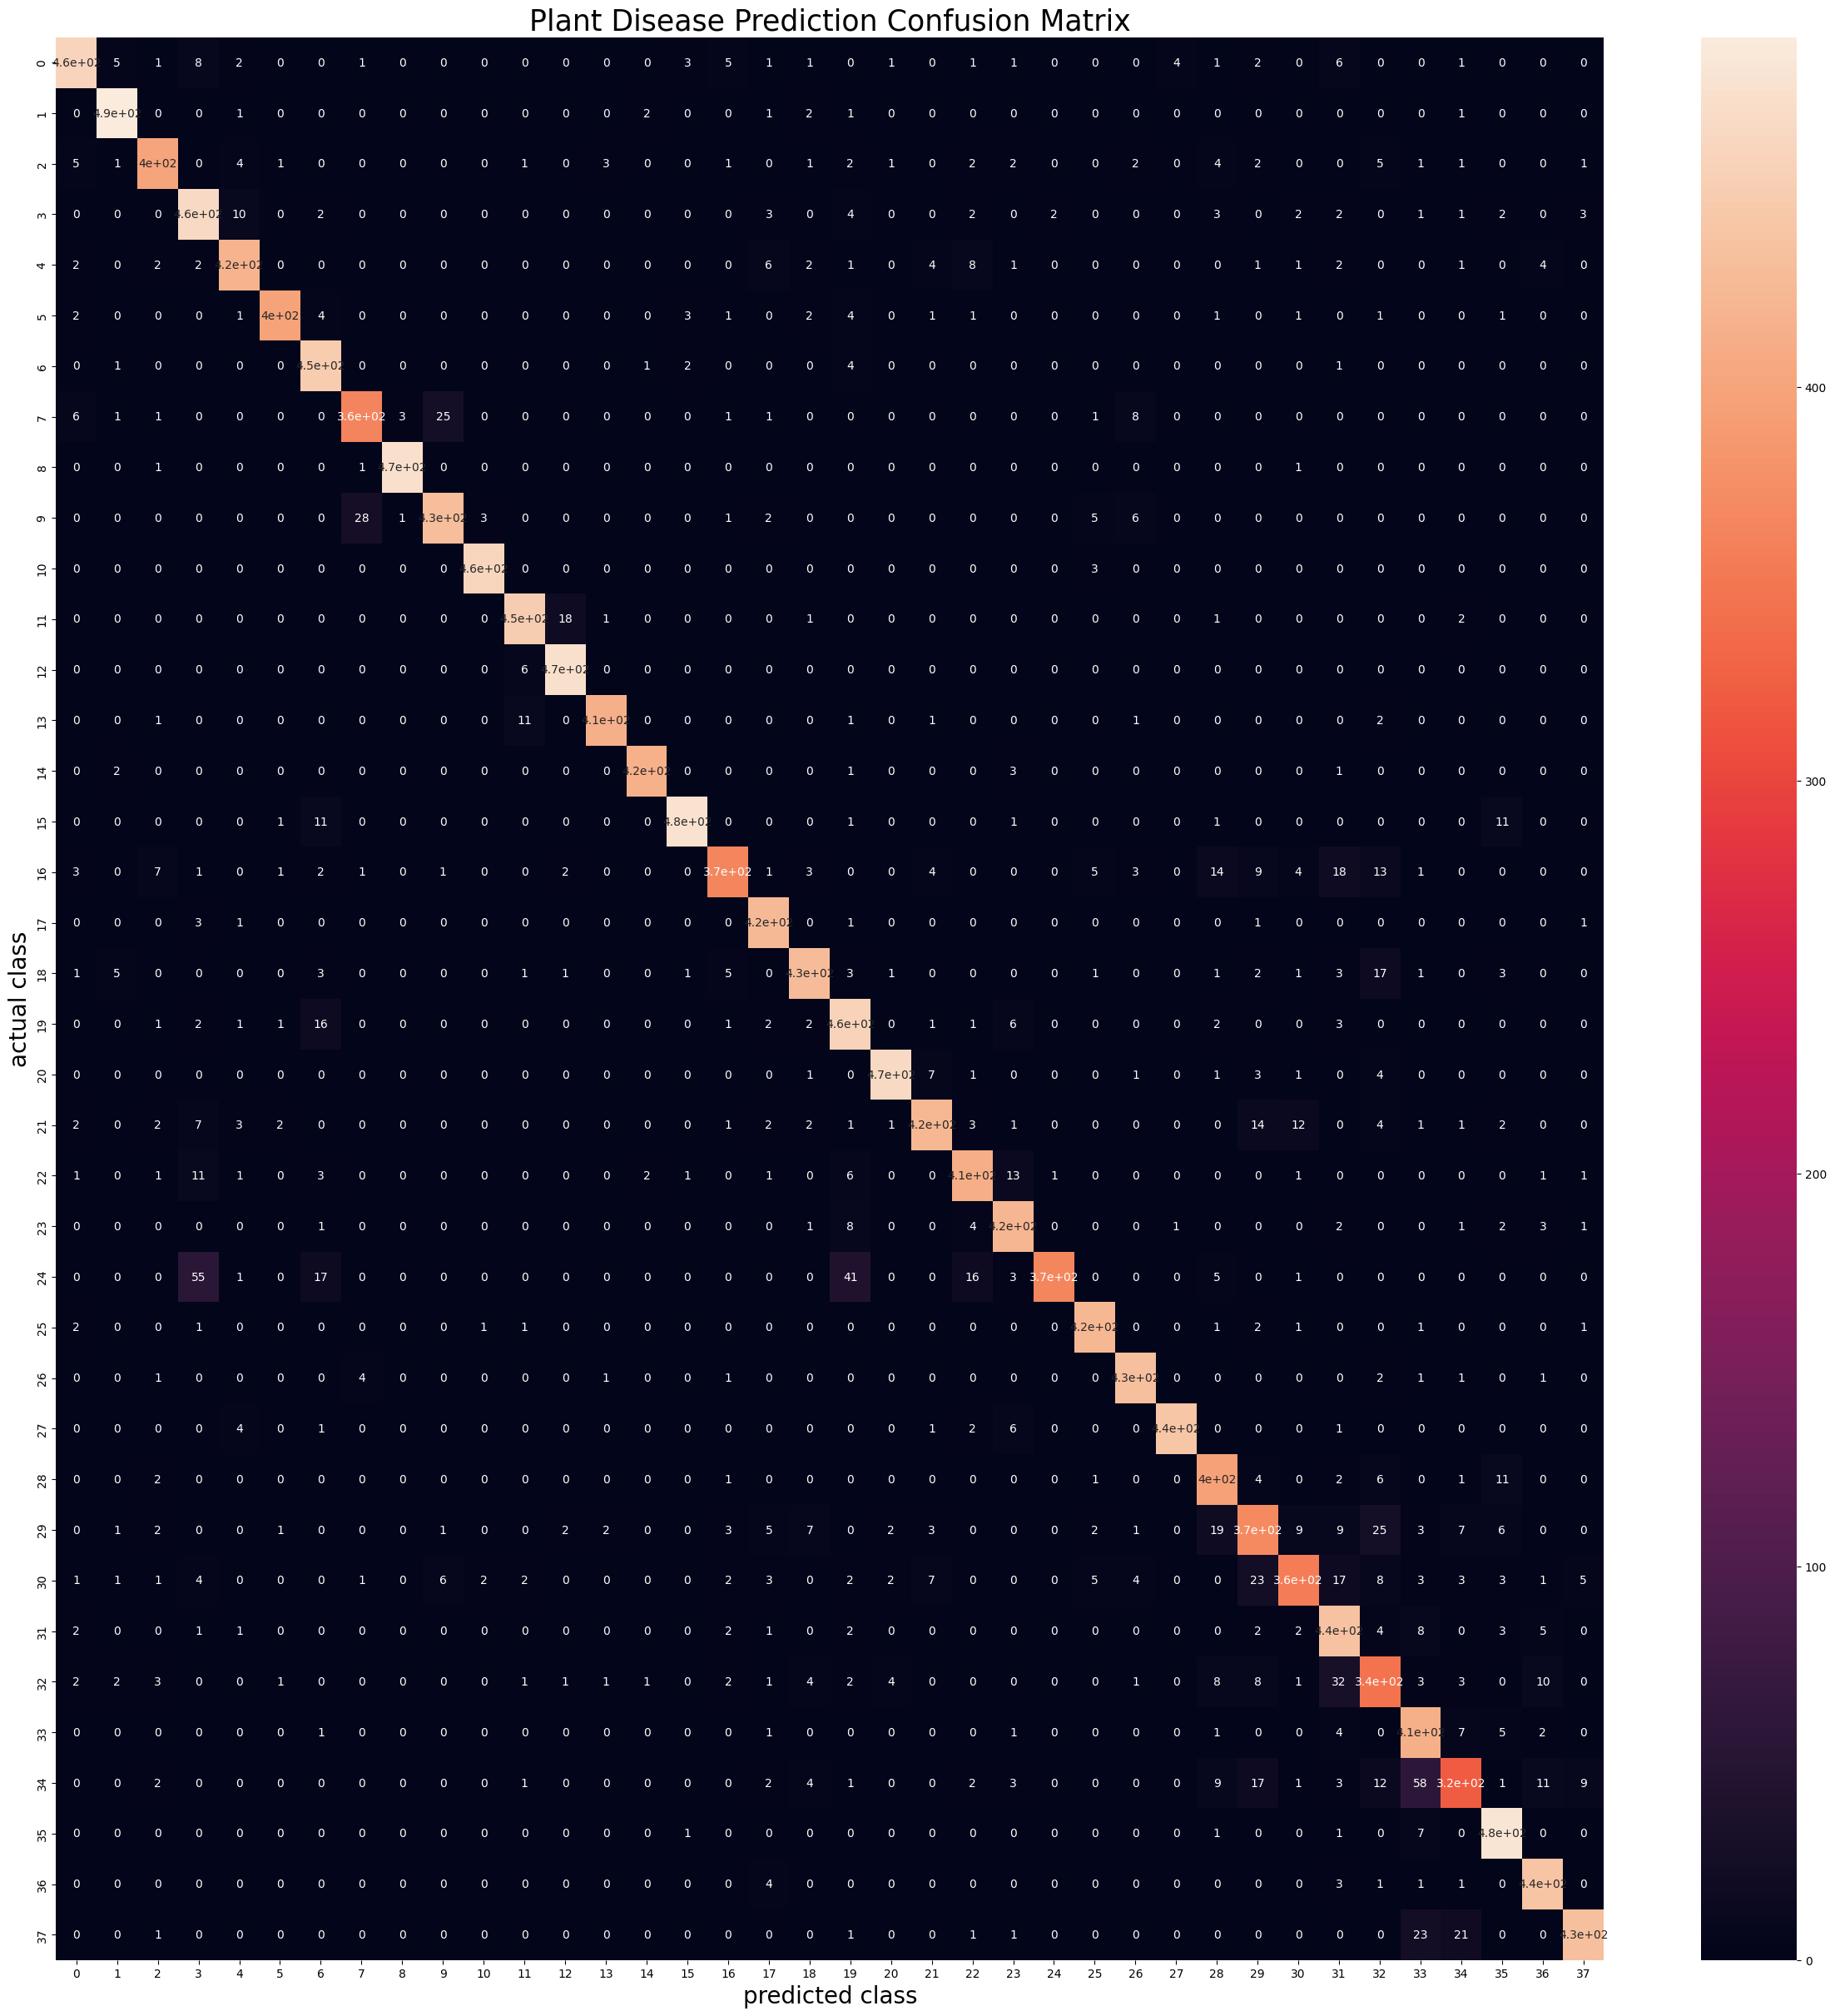

In [42]:
plt.figure(figsize=(30,30))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("predicted class",fontsize=20)
plt.ylabel("actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()